# Frameworks para RNAs

Para não precisarmos escrever código para cada rede neural, existem frameworks que abstraem a implementação e focam no uso das redes neurais, são eles: TensorFlow e o Keras.

Antes de vermos na prática o uso deles, vamos visualizar uma rede neural em ação, utilizando o TensorFlow playgroud. Acesse-o em:

[Clique aqui para acessar o TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.93197&showTestData=false&discretize=false&percTrainData=30&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&batchSize_hide=true&discretize_hide=true&regularization_hide=true&regularizationRate_hide=true)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()


iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
print("\nDistribuição das classes:")
iris_df['target'].value_counts()


Distribuição das classes:


,count
target,
0.0,50
1.0,50
2.0,50


In [5]:
# converter o target para o hotncold pq não existe uma noção de valor maior ou menor de uma flor pra outra

X = iris.data
y = iris.target

In [6]:
from tensorflow.keras.utils import to_categorical

y_one_hot = to_categorical(y, num_classes=3)
print(y_one_hot[:5])


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [25]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=True)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9831 - loss: 0.0508 - val_accuracy: 0.9583 - val_loss: 0.0798
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9831 - loss: 0.0681 - val_accuracy: 0.9583 - val_loss: 0.0805
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9583 - val_loss: 0.0810
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9948 - loss: 0.0515 - val_accuracy: 0.9583 - val_loss: 0.0798
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9831 - loss: 0.0615 - val_accuracy: 0.9583 - val_loss: 0.0792
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9948 - loss: 0.0421 - val_accuracy: 0.9583 - val_loss: 0.0792
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9948 - loss: 0.0417 - val_accuracy: 0.9583 - val_loss: 0.0793
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9831 - loss: 0.0552 - val_accuracy: 0.9583 - v

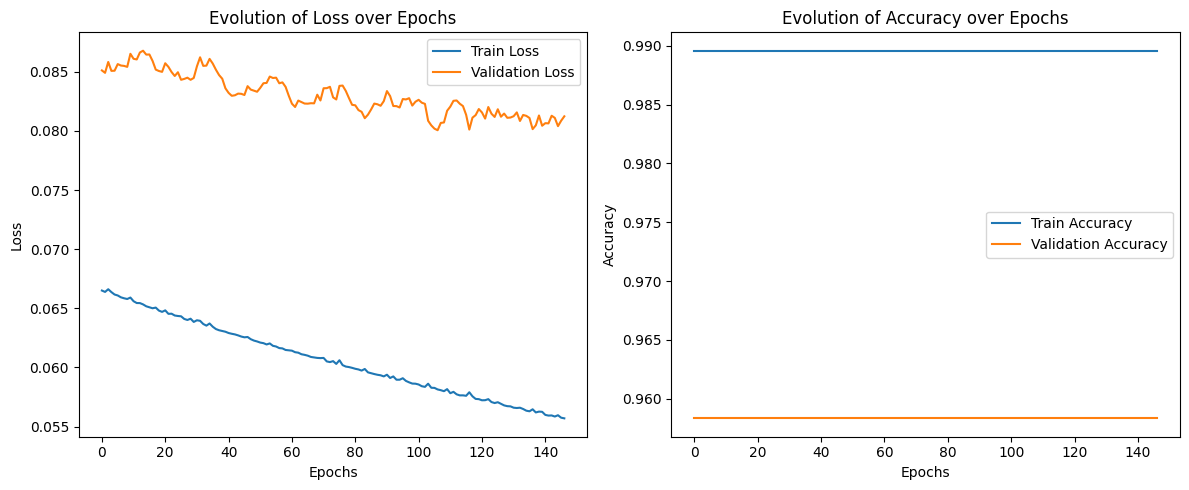

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolution of Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolution of Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

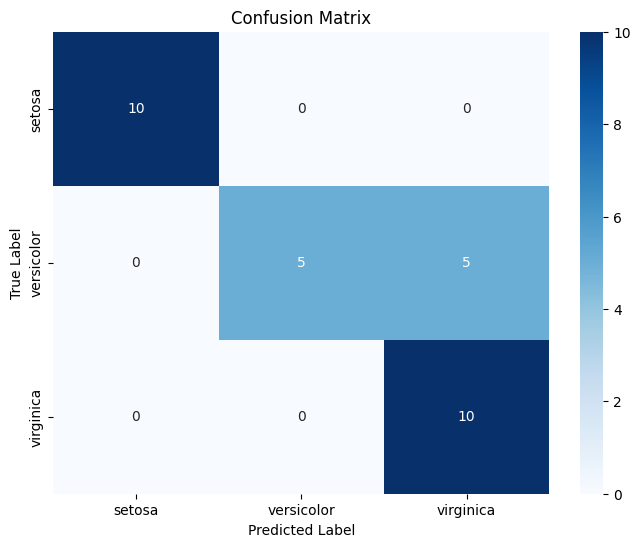

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Rede neural para regressão

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

TensorFlow: 2.18.0
Keras: 3.8.0


MedInc: Renda média dos moradores

HouseAge: Idade média das casas

AveRooms: Média de cômodos por residência

AveBedrms: Média de quartos por residência

Population: População do bairro

AveOccup: Média de moradores por casa

Latitude: Coordenada geográfica

Longitude: Coordenada geográfica

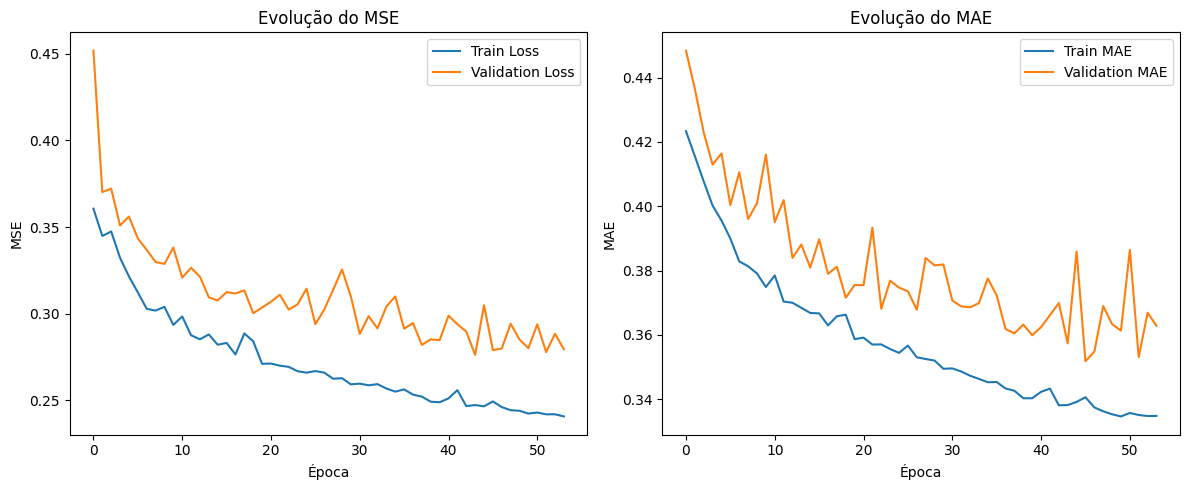

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolução do MSE')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Evolução do MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Métricas de Desempenho:
MSE: 0.2684
MAE: 0.3519 (≈ $35194.63 em erro médio)
R²: 0.7952


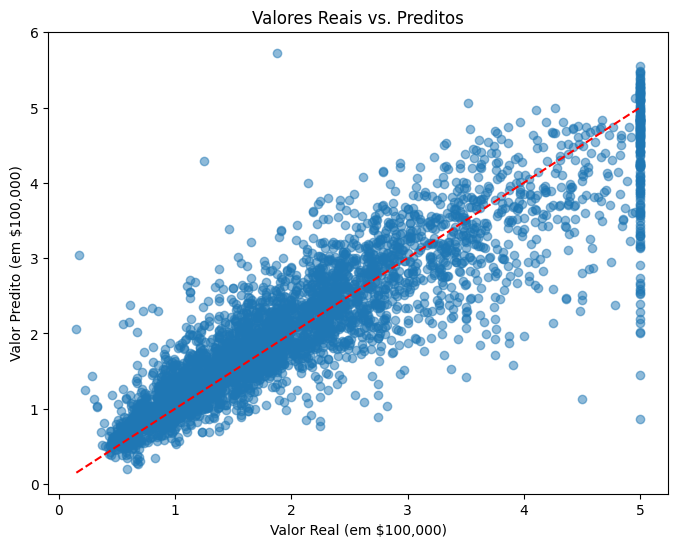

In [ ]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Métricas de Desempenho:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f} (≈ ${mae*100000:.2f} em erro médio)")
print(f"R²: {r2:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Valores Reais vs. Preditos')
plt.xlabel('Valor Real (em $100,000)')
plt.ylabel('Valor Predito (em $100,000)')
plt.show()